In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Statistical Summary of the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


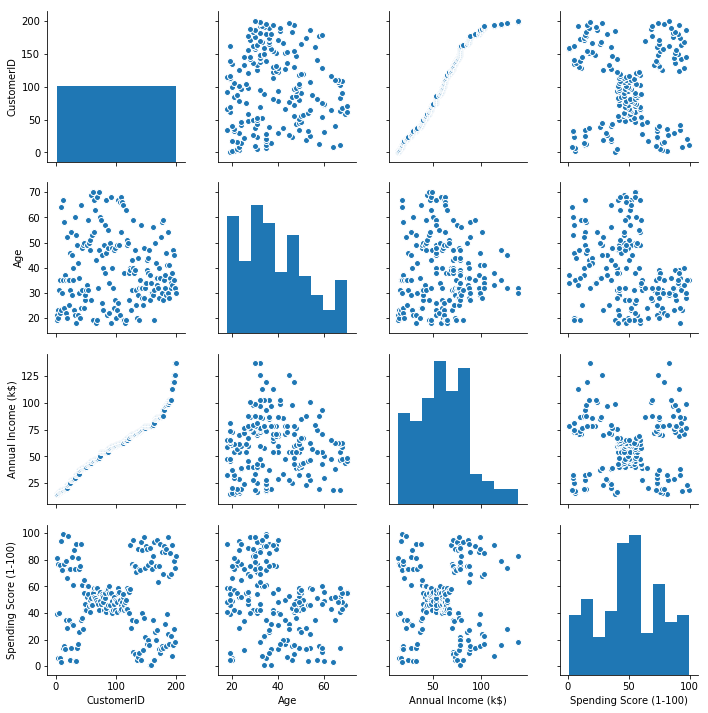

In [7]:
import seaborn as sns
sns.pairplot(data)

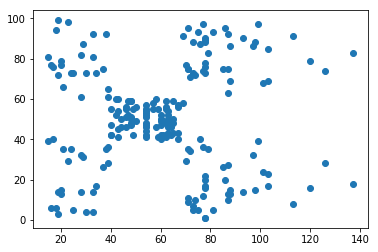

In [8]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

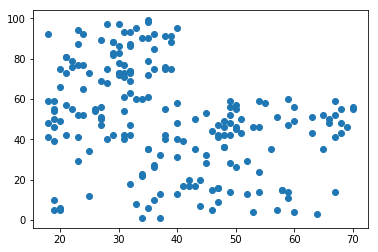

In [9]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

In [10]:
#Use algorithms to get this view.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,
              random_state=10)

In [11]:
features = data.iloc[:,[3,4]].values

In [12]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [13]:
group = model.predict(features)

In [14]:
group

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [16]:
dataResult = data
dataResult['group'] = group
dataResult.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0


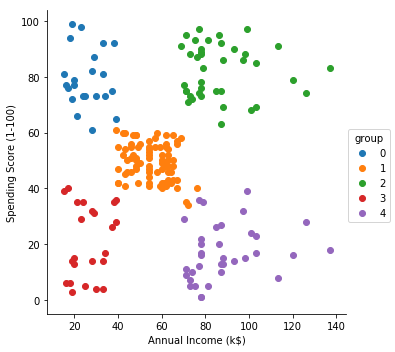

In [18]:
import seaborn as sns
sns.FacetGrid(dataResult,hue='group',size=5) \
    .map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)') \
    .add_legend()

In [19]:
#Deploy the result
dataResult.to_csv('FinalResult.csv' , index= False)

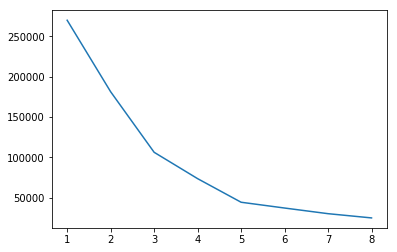

In [21]:
# How can we figure out whether the K value I selected is a Ideal value or not w.r.t .dataset?
# Check for errors -----> WCSS - Within Cluster Sum of Squares
# Elbow method

from sklearn.cluster import KMeans
wcss=[]
for kvalues in range(1,9):
    model1 = KMeans(n_clusters=kvalues, random_state=10)
    model1.fit(features)
    wcss.append(model1.inertia_)

plt.plot(range(1,9),wcss)

In [ ]:
# k = 5